<a href="https://colab.research.google.com/github/Judhajit-Roy/sentiment-analysis-hotel-reviews/blob/main/Sentiment_Analysis_on_Hotel_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: tripadvisor_hotel_reviews.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
from nltk.corpus import wordnet
import wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ratings of Hotels')

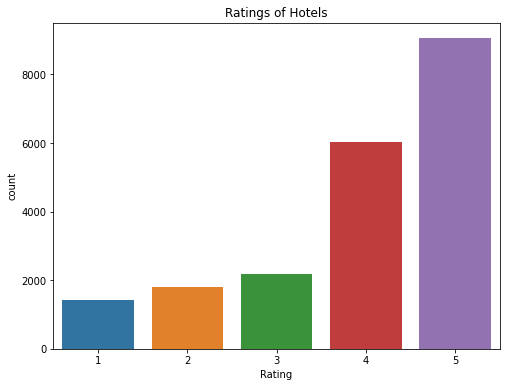

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df["Rating"])
plt.title("Ratings of Hotels")

In [ ]:
def sentiment(review):
    if review > 3:
      return 2
    if review==3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [ ]:
def sentiment_word(review):
    if review > 3:
      return 'Positive'
    if review==3:
        return 'Neutral'
    else:
        return 'Negative'
df['Sentiment_word']= df['Rating'].apply(sentiment_word)

In [ ]:
df["word_count"] = df["Review"].apply(lambda x: len(x.split()))

In [ ]:
df1 = df[["word_count","Sentiment_word"]].groupby('Sentiment_word').mean('word_count')

In [ ]:
df1.columns

Index(['word_count'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sentiment Distribution of Hotels Review ')

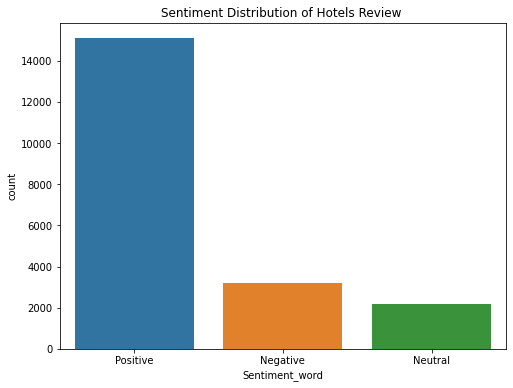

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df["Sentiment_word"])
plt.title("Sentiment Distribution of Hotels Review ")

Text(0.5, 1.0, 'Average Number of Words in Sentence of Hotels Review ')

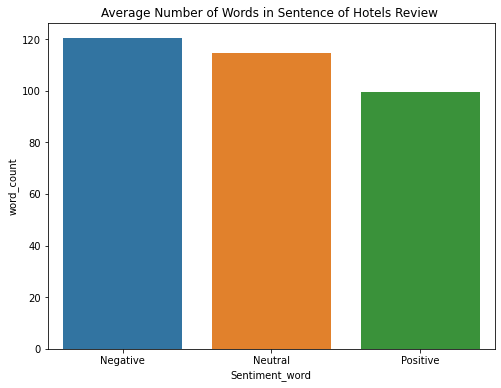

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df1.index,y='word_count',data=df1)
plt.title("Average Number of Words in Sentence of Hotels Review ")

In [ ]:
nltk.pos_tag(word_tokenize("Hi how are you doing"))

[('Hi', 'NNP'),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG')]

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# warnings.filterwarnings(action="ignore")
# %matplotlib inline
# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
text = df['Crime type'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def get_wordnet_pos(word):
    # Changes postag to lemmatize 
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
word ="doing"
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize((word),get_wordnet_pos(word))

'do'

In [ ]:
import re
df = pd.read_csv("./tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:

lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.split()
    review = [lemmatizer.lemmatize((word),get_wordnet_pos(word)) for word in review]
    review = ' '.join(review)
    df['Review'][i]=review
    corpus.append(review)
corpus[:1]

def sentiment(review):
    if review > 3:
      return 2
    if review==3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
count_vect = CountVectorizer(max_features=10000)
#X = count_vect.fit_transform(corpus)
X = tfidf.fit_transform(corpus)
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=24)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpus[0]

'nice hotel expensive parking get good deal stay hotel anniversary arrive late even take advice previous review do valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow not soundproof like heard music room night morning loud bang door opening closing hear people talk hallway maybe just noisy neighbor aveda bath product nice do not goldfish stay nice touch take advantage stay longer location great walk distance shopping overall nice experience have pay parking night'

In [ ]:
df.loc[0]

Review       nice hotel expensive parking get good deal sta...
Rating                                                       4
Sentiment                                                    2
Name: 0, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8596525473355455

In [ ]:
from sklearn.neural_network import MLPClassifier
import time
hl = [(50,50),(100,), (30,30,30),(100,100)]
lrate = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in hl:
    mlp = MLPClassifier(hidden_layer_sizes=i,early_stopping=True)
    start = time.time()
    mlp.fit(X_train, y_train)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    print("Training score: ",i, mlp.score(X_train, y_train))
    print("Testing score: ",i, mlp.score(X_test, y_test))



In [ ]:
from sklearn.model_selection import validation_curve
param_range=np.logspace(-3, 0, 3)
train_scores, valid_scores = validation_curve(
    MLPClassifier(early_stopping=True), X_train, y_train, param_name="learning_rate_init", param_range=param_range,cv=5)

In [ ]:
valid_scores

array([[0.86564736, 0.86239427, 0.86629798, 0.86788155, 0.86820696],
       [0.86239427, 0.85914118, 0.8490566 , 0.85974618, 0.86039701],
       [0.73812622, 0.77618738, 0.73812622, 0.73836642, 0.73836642]])

In [ ]:
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_mean

array([0.86608563, 0.85814705, 0.74583453])

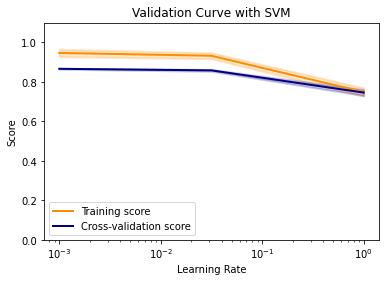

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
# test_scores_std = np.std(valid_scores, axis=1)


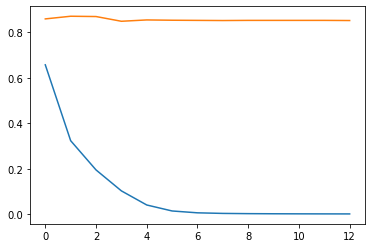

In [ ]:
plt.plot(mlp.loss_curve_)
plt.plot(mlp.validation_scores_)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
gnb.score(X_test.toarray(), y_test)

0.6644544212375562

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb.score(X_test, y_test)

0.8297872340425532

In [ ]:
y_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print(report)
print("Accuracy of MLP Model: {}%".format(acc*100))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       785
           1       0.29      0.48      0.36       344
           2       0.97      0.91      0.94      3994

    accuracy                           0.86      5123
   macro avg       0.68      0.73      0.69      5123
weighted avg       0.89      0.86      0.87      5123

Accuracy of MLP Model: 86.04333398399375%


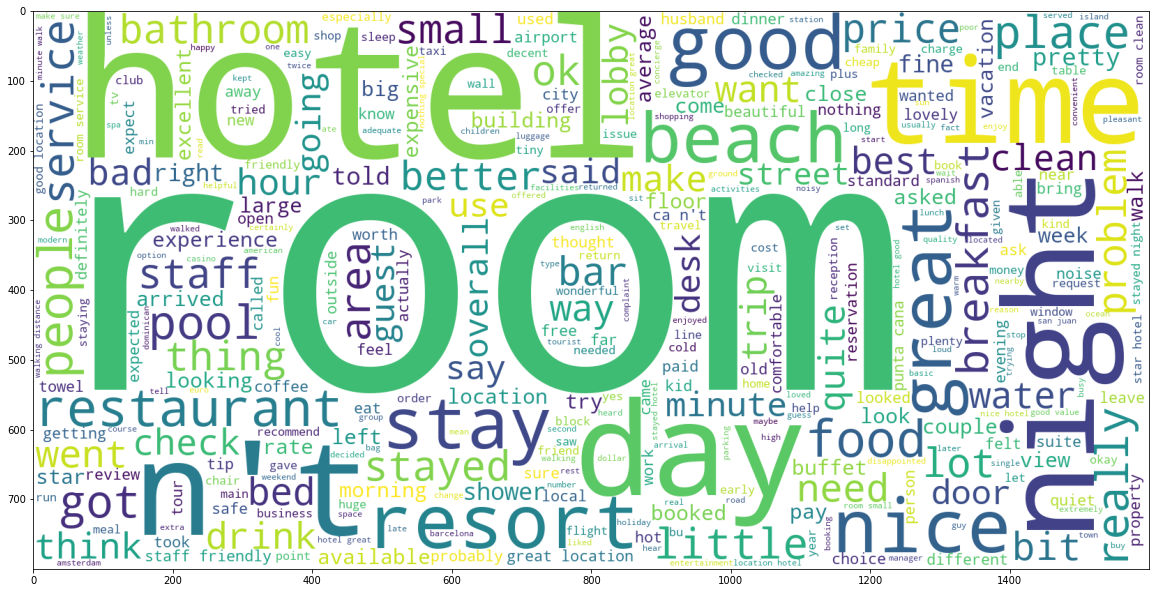

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["Rating"]==3].Review))
plt.imshow(wc1)